In [1]:
import random
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras import layers
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import itertools

In [2]:
# Initialize
epochs = 150
learning_rate = 1e-3
batch_size = 384
img_dims =  (50,50,3)

In [3]:
X_test = np.load("x_test_fold-10.npy")
y_test = np.load("y_test_fold-10.npy")

In [4]:
model = Sequential()
inputShape = (50, 50, 3)
chanDim = -1   
        
model.add(layers.Conv2D(32, (3,3), padding='same', input_shape=inputShape, activation='relu'))
model.add(layers.BatchNormalization(axis=chanDim))
model.add(layers.MaxPool2D(pool_size=(3,3)))
model.add(layers.Dropout(0.25))
       

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=chanDim))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=chanDim))
model.add(layers.MaxPool2D(pool_size=(3,3)))
model.add(layers.Dropout(0.25))
        
        
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=chanDim))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization(axis=chanDim))
model.add(layers.MaxPool2D(pool_size=(3,3)))
model.add(layers.Dropout(0.25))

        
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
        
model.add(layers.Dense(2, activation='softmax'))

In [5]:
#load the weights
model.load_weights('weights-improvement-163-0.89.hdf5')

In [6]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",verticalalignment="bottom",
            color="red" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     19873
           1       0.81      0.80      0.80      7878

    accuracy                           0.89     27751
   macro avg       0.86      0.86      0.86     27751
weighted avg       0.89      0.89      0.89     27751



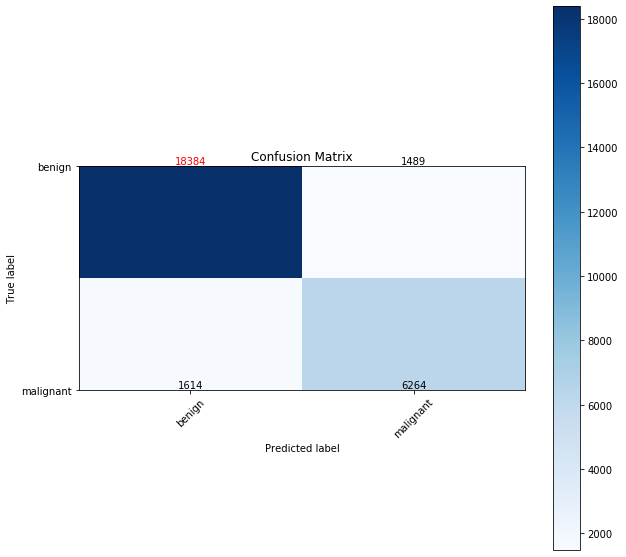

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

cm_plot_labels = ['benign','malignant']

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

print(classification_report(y_test, y_pred))

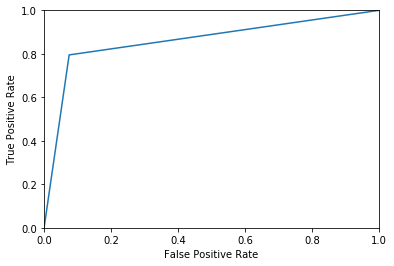

AUC Score:  0.860099943859042


In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr)

auc_score=roc_auc_score(y_test, y_pred)
print("AUC Score: ", auc_score)